<a href="https://colab.research.google.com/github/saranyapalani/Servlet/blob/master/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
#@title Introducing Colaboratory { display-mode: "form" }
#@markdown This 3-minute video gives an overview of the key features of Colaboratory:
from IPython.display import YouTubeVideo
YouTubeVideo('inN8seMm7UI', width=600, height=400)

## Getting Started

The document you are reading is a  [Jupyter notebook](https://jupyter.org/), hosted in Colaboratory. It is not a static page, but an interactive environment that lets you write and execute code in Python and other languages.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [0]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter".

All cells modify the same global state, so variables that you define by executing a cell can be used in other cells:

In [0]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

For more information about working with Colaboratory notebooks, see [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb).


## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.

In [0]:
%matplotlib inline

import folium
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from folium.plugins import MarkerCluster


In [2]:
dataset_path = 'new_rob.csv'
# read dataset
df = pd.read_csv(dataset_path, engine='python')

df.head(5)

,crimecode,eventid,occ_date,occ_time,occ_day,occ_month,occ_week,occ_hour,occ_year,location,offence,weapons used,lat,long
0,4786321,HM399414,8/17/2018,15:03,15,August,Friday,14,2018,RESIDENCE,Robbery,gun,43.653210,-79.381287
1,4676906,HM278933,4/15/2018,8:55,2,October,Thursday,1,2018,RESIDENCE,Robbery,gun,43.785351,-79.278572
2,4789749,HM402220,8/17/2018,15:03,19,October,Sunday,6,2018,RESIDENCE,Robbery and murder,gun,43.700970,-79.399261
3,4789765,HM402058,8/17/2018,15:03,19,October,Sunday,20,2018,OTHER,Robbery,knife,43.739391,-79.513222
4,4677901,HM275615,4/15/2018,8:55,19,October,Sunday,18,2018,RESIDENCE,Robbery and murder,firearms,43.720444,-79.551483


In [3]:
df.shape


(49, 14)

In [4]:
df.dtypes


crimecode         int64
eventid          object
occ_date         object
occ_time         object
occ_day           int64
occ_month        object
occ_week         object
occ_hour          int64
occ_year          int64
location         object
offence          object
weapons used     object
lat             float64
long            float64
dtype: object

In [5]:
df = df[['crimecode', 'offence', 'weapons used',
         'occ_year', 'occ_month', 'occ_week', 'occ_hour', 'lat', 'long', 'location']]

df.head(5)


,crimecode,offence,weapons used,occ_year,occ_month,occ_week,occ_hour,lat,long,location
0,4786321,Robbery,gun,2018,August,Friday,14,43.653210,-79.381287,RESIDENCE
1,4676906,Robbery,gun,2018,October,Thursday,1,43.785351,-79.278572,RESIDENCE
2,4789749,Robbery and murder,gun,2018,October,Sunday,6,43.700970,-79.399261,RESIDENCE
3,4789765,Robbery,knife,2018,October,Sunday,20,43.739391,-79.513222,OTHER
4,4677901,Robbery and murder,firearms,2018,October,Sunday,18,43.720444,-79.551483,RESIDENCE


In [6]:
df.isnull().sum() / df.shape[0]


crimecode       0.0
offence         0.0
weapons used    0.0
occ_year        0.0
occ_month       0.0
occ_week        0.0
occ_hour        0.0
lat             0.0
long            0.0
location        0.0
dtype: float64

In [7]:
df['weapons used'].unique()


array(['gun', 'knife', 'firearms', 'iron rods', 'guns', ' gun', 'kinfe'],
      dtype=object)

In [9]:
year_group = df.groupby(['occ_year'])['crimecode'].count()

year_group

occ_year
2018    49
Name: crimecode, dtype: int64

In [10]:
month_group = df.groupby(['occ_month'])['crimecode'].count()

month_group

occ_month
August        1
December     12
January       1
November     12
October      20
September     3
Name: crimecode, dtype: int64

In [25]:
day_group = df.groupby(['occ_week'])['crimecode'].count()

day_group

occ_week
Friday         7
Monday         3
Saturday       8
Sunday         5
Thursday       7
Tuesday        8
Wednesday     11
Name: crimecode, dtype: int64

In [26]:
loc = df.dropna(subset=['location'])
loc_group = distr.groupby(['location'])['crimecode'].count()

loc_group


location
APARTMENT      8
OTHER          5
RESIDENCE     34
RESIDENCE      1
STREET         1
Name: crimecode, dtype: int64

In [0]:
images_path = 'Users\Admin\Pictures'


In [0]:
def make_plot(ser, xlabel, ylabel, title, images_path, image_name):
    """ Make a bar plot on the given series. """
    sns.set(style="darkgrid")

    norm = plt.Normalize(0, ser.values.max())
    colors = plt.cm.Blues(norm(ser.values))
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(ser.index, ser.values, palette=colors)
    ax.set(ylabel=ylabel, xlabel=xlabel)
    plt.title(title)
    # save plot to an image
    plt.savefig(images_path + image_name, bbox_inches="tight")
    plt.show()
    plt.close()


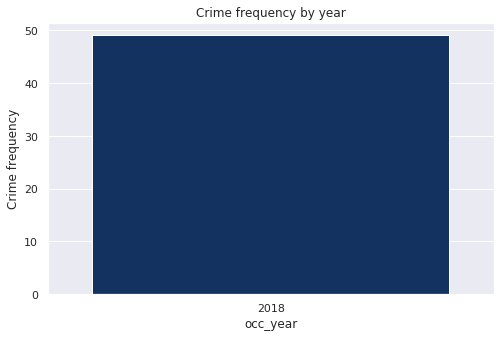

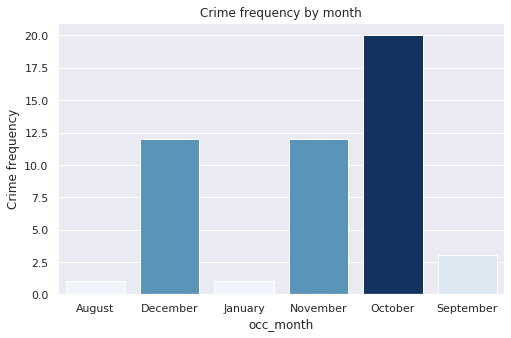

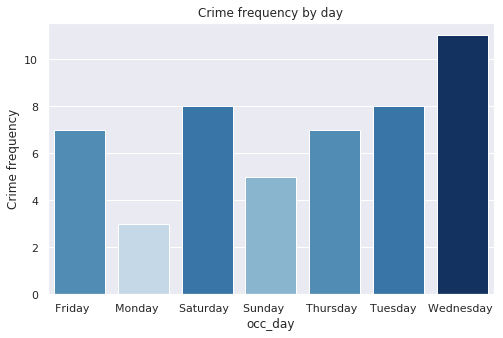

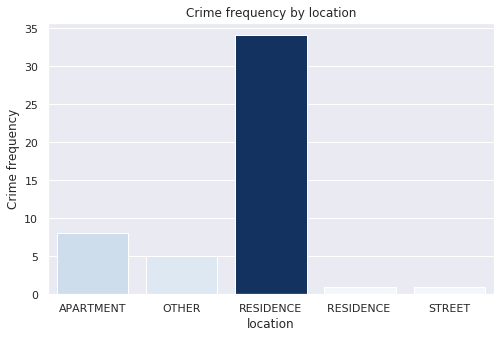

In [29]:
make_plot(year_group, 'occ_year', 'Crime frequency',
          'Crime frequency by year', images_path, 'year.png')
make_plot(month_group, 'occ_month', 'Crime frequency',
          'Crime frequency by month', images_path, 'month.png')
make_plot(day_group, 'occ_day', 'Crime frequency',
          'Crime frequency by day', images_path, 'day.png')
make_plot(loc_group, 'location', 'Crime frequency',
          'Crime frequency by location', images_path, 'location.png')


In [32]:
shootings_year_group = df.loc[df['weapons used'] == 'gun'].groupby(
    ['occ_month'])['crimecode'].count()

print('Year with most gun shootings is', shootings_year_group.idxmax())

Year with most gun shootings is October


In [34]:
shootings_loc_group = df.loc[df['weapons used'] == 'gun'].groupby(
    ['location'])['crimecode'].count()
print('location with most gun shootings is', shootings_loc_group.idxmax())


location with most gun shootings is RESIDENCE


In [35]:
l = []
for i, val in df['occ_hour'].iteritems():
    # if hour is between 6pm (18) and 6am (0) it's night, else it's day
    if (val >= 18) or (val <= 6):
        l.append('night')
    else:
        l.append('day')

new_ser = pd.Series(l)
df['LIGHT'] = new_ser

df.head(5)


,crimecode,offence,weapons used,occ_year,occ_month,occ_week,occ_hour,lat,long,location,LIGHT
0,4786321,Robbery,gun,2018,August,Friday,14,43.653210,-79.381287,RESIDENCE,day
1,4676906,Robbery,gun,2018,October,Thursday,1,43.785351,-79.278572,RESIDENCE,night
2,4789749,Robbery and murder,gun,2018,October,Sunday,6,43.700970,-79.399261,RESIDENCE,night
3,4789765,Robbery,knife,2018,October,Sunday,20,43.739391,-79.513222,OTHER,night
4,4677901,Robbery and murder,firearms,2018,October,Sunday,18,43.720444,-79.551483,RESIDENCE,night


In [36]:
light_count = df.groupby(['LIGHT'])['crimecode'].count()
print('Most crimes were committed during the', light_count.idxmax())


Most crimes were committed during the night


In [37]:
light_group = df.loc[df['LIGHT'] == 'day'].groupby(
    ['offence'])['crimecode'].count()
print('Most frequent type of crime during the day is', light_group.idxmax())


Most frequent type of crime during the day is Robbery 


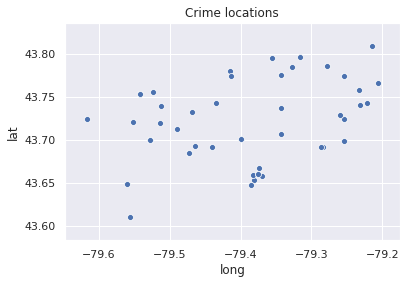

In [40]:
location = df[['lat', 'long']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['lat'] > 40) & (location['long'] < -60)]
# make a scatterplot for crime locations
ax = sns.scatterplot(x='long', y='lat', data=location)
plt.title('Crime locations')
plt.savefig(images_path + 'scatter.png', bbox_inches="tight")
plt.show()
plt.close()


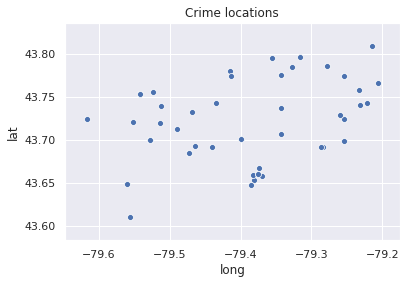

In [41]:
location = df[['lat', 'long']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['lat'] > 40) & (location['long'] < -60)]
# make a scatterplot for crime locations
ax = sns.scatterplot(x='long', y='lat', data=location)
plt.title('Crime locations')
plt.savefig(images_path + 'scatter.png', bbox_inches="tight")
plt.show()
plt.close()


In [0]:
def kmeans(df, images_path, image_name, title, n_clusters):
    """ Cluster locations using KMeans and make a plot. """
    # make a copy so that initial dataset remains the same
    df_cp = df.copy()

    km = KMeans(n_clusters=n_clusters)
    km.fit(df_cp)
    km.predict(df_cp)
    labels = km.labels_

    LABEL_COLOR_MAP = {0: 'darkturquoise',
                       1: 'plum',
                       2: 'saddlebrown',
                       3: 'greenyellow',
                       4: 'green',
                       5: 'royalblue',
                       6: 'gold',
                       7: 'firebrick',
                       8: 'coral',
                       9: 'darkmagenta'
                       }

    label_color = [LABEL_COLOR_MAP[l] for l in labels]
    # make plot
    plt.scatter(x='long', y='lat', c=label_color, data=df_cp)
    plt.title(title)
    plt.savefig(images_path + image_name, bbox_inches="tight")
    plt.show()
    plt.close()


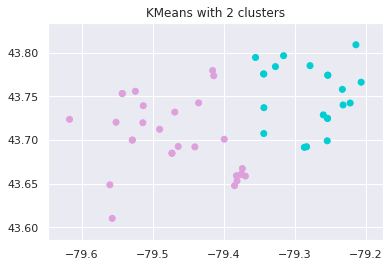

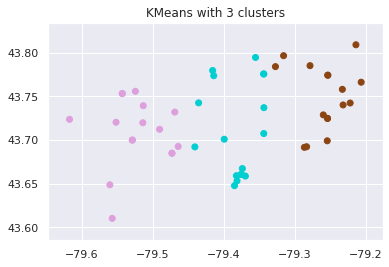

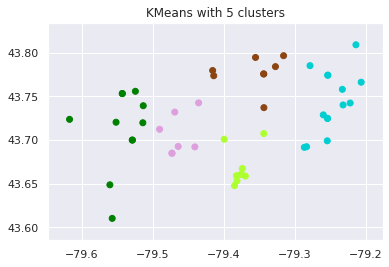

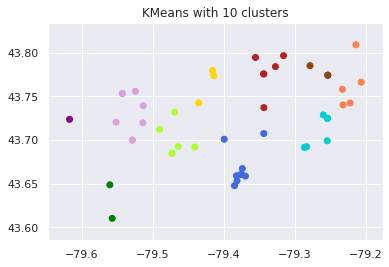

In [45]:
kmeans(location, images_path, 'kmeans2.png', 'KMeans with 2 clusters', 2)
kmeans(location, images_path, 'kmeans3.png', 'KMeans with 3 clusters', 3)
kmeans(location, images_path, 'kmeans5.png', 'KMeans with 5 clusters', 5)
kmeans(location, images_path, 'kmeans10.png', 'KMeans with 10 clusters', 10)


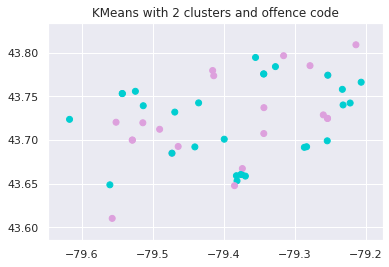

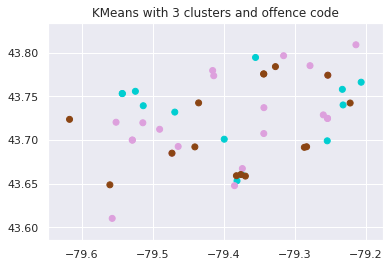

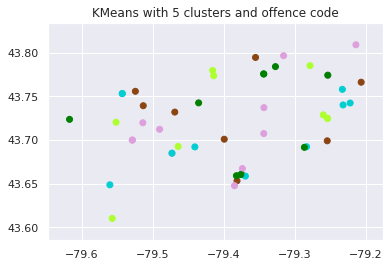

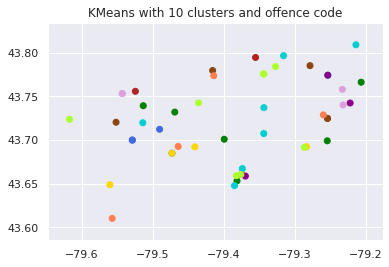

In [48]:
location = df[['lat', 'long', 'crimecode']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['lat'] > 40) & (location['long'] < -60)]
                                                  
kmeans(location, images_path, 'kmeansoffence2.png', 
       'KMeans with 2 clusters and offence code', 2)
kmeans(location, images_path, 'kmeansoffence3.png',
       'KMeans with 3 clusters and offence code', 3)
kmeans(location, images_path, 'kmeansoffence5.png',
       'KMeans with 5 clusters and offence code', 5)
kmeans(location, images_path, 'kmeansoffence10.png',
       'KMeans with 10 clusters and offence code', 10)

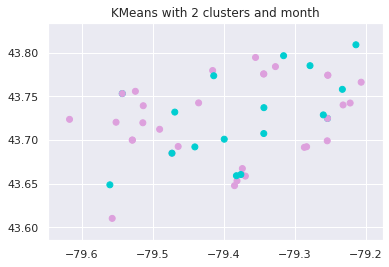

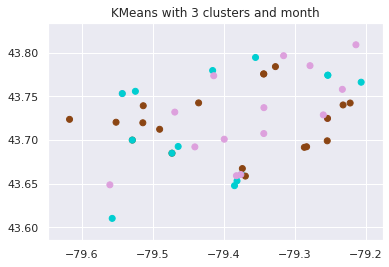

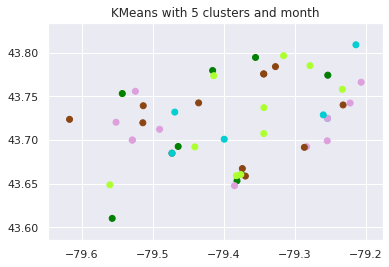

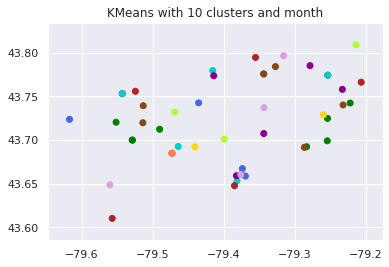

In [51]:
location = df[['lat', 'long', 'occ_hour']]
# drop nan values in location
location = location.dropna()
# remove outliers
location = location.loc[(location['lat'] > 40) & (location['long'] < -60)]

kmeans(location, images_path, 'kmeansmonth2.png',
       'KMeans with 2 clusters and month', 2)
kmeans(location, images_path, 'kmeansmonth3.png',
       'KMeans with 3 clusters and month', 3)
kmeans(location, images_path, 'kmeansmonth5.png',
       'KMeans with 5 clusters and month', 5)
kmeans(location, images_path, 'kmeansmonth10.png',
       'KMeans with 10 clusters and month', 10)
